In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import ephem
from matplotlib import animation
import healpy as hp
hp.disable_warnings()

'''
Uses info from https://geohack.toolforge.org/geohack.php?pagename=Murchison_Radio-astronomy_Observatory&params=26.70312_S_116.670575_E_
as well as https://rhodesmill.org/pyephem/quick.html
'''
MRO_observer = ephem.Observer()
MRO_observer.lon = '115.8613' 
MRO_observer.lat = '-31.9523'
MRO_observer.elevation = 0
MRO_observer.date = datetime(2022, 4, 13, 22-8, 10) #Year, month, date, hrs, mins - UTC
# MRO_observer.date = datetime.utcnow()
ra_rad, dec_rad = MRO_observer.radec_of(0, np.pi/2)
print ("LST =",ra_rad*12/np.pi, "hrs")

LST = 11.322184339242877 hrs


/home/jishnu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log2
  if sys.path[0] == '':


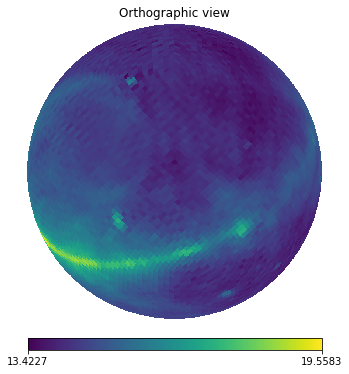

In [2]:
sky_map = hp.ud_grade(hp.read_map("/home/jishnu/SKY_MAPS/lambda_haslam408_nofilt.fits", dtype=np.float64), nside_out=32)
# hp.mollview(sky_map, cmap='viridis')

lst_hrs = ra_rad*12/np.pi
ra_deg  = lst_hrs*360/24.0
dec_deg = -26.70312

r_map = hp.Rotator(rot=[ra_deg, dec_deg], coord=['G', 'C'])    
sky_val = r_map.rotate_map_alms(sky_map, use_pixel_weights=False)
# hp.mollview(sky_val, cmap='viridis')

map_here = hp.orthview(np.log2(sky_val), half_sky=True, return_projected_map=True)


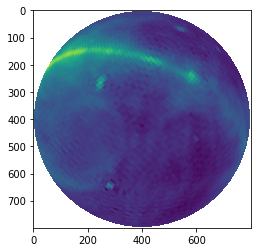

In [3]:
plt.figure()
plt.imshow(map_here)
# plt.axes()

/home/jishnu/.local/lib/python3.6/site-packages/matplotlib/image.py:447: RuntimeWarning: invalid value encountered in double_scalars
  vmid = self.norm.vmin + dv / 2


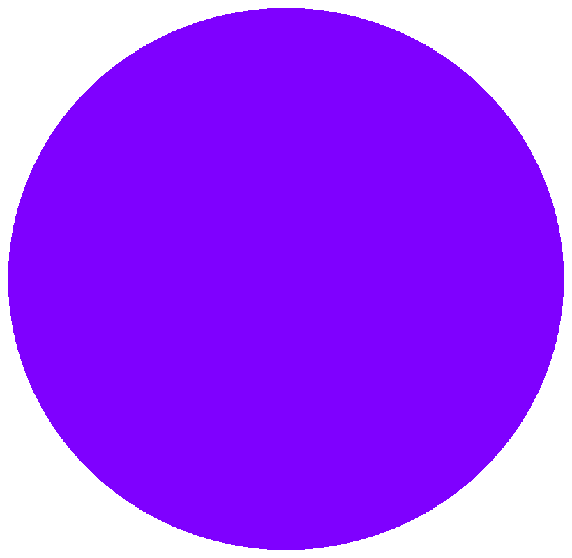

In [7]:
fig, ax_wfall = plt.subplots(1, 1, figsize=(10,10))
fig.canvas.manager.set_window_title('Sky view') 
ax_wfall.axis('off')

im = ax_wfall.imshow(map_here, aspect='auto', cmap='rainbow', vmin=np.min(map_here), vmax=np.max(map_here))

def animate_func(i):

    # MRO_observer.date = datetime(2022, 4, 13, 22-8, 10) #Year, month, date, hrs, mins - UTC
    MRO_observer.date = datetime.utcnow()
    ra_rad, dec_rad = MRO_observer.radec_of(0, np.pi/2)
    print ("LST =",ra_rad*12/np.pi, "hrs")

    r_map = hp.Rotator(rot=[ra_deg, dec_deg], coord=['G', 'C'])    
    sky_val = r_map.rotate_map_alms(sky_map, use_pixel_weights=False)

    map_here = np.log2(hp.orthview(np.log2(sky_val), half_sky=True, return_projected_map=True))


    im.set_array(map_here)

    return [im]

anim = animation.FuncAnimation(fig, animate_func, frames = None)
                               
plt.show() 